In [9]:
import sys
sys.path.append('../')
from os.path import dirname, realpath
# filepath = realpath(__file__)
# dir_of_file = dirname(filepath)
# parent_dir_of_file = dirname(dir_of_file)
# sys.path.append(parent_dir_of_file)
import tifffile as tif
from scipy import signal
from pathlib import Path
from tqdm import tqdm 
from get_list_data import expt1_data_list, expt2_data_list, expt2_start_end_idx, expt3_data_list
from helper import *
import gc
import numpy as np
from scipy.io import savemat
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF


In [6]:
data_root = '/media/user/teamshare/nick/behavior/grooming/1p/'
data_list = expt1_data_list

In [11]:
for ii, expt in enumerate(data_list):
    mouse_id, list_rec_dir = expt
    components_file = data_root + os.sep + mouse_id + os.sep + "outputs" + os.sep + 'components99.mat'
    num_components99 = []
    for jj, rec_dir in enumerate(tqdm(list_rec_dir)):
        brain_cam0_file = data_root + os.sep + mouse_id + os.sep + rec_dir + os.sep + 'cam0.tif'
        print(brain_cam0_file)
        brain_stack = tif.imread(brain_cam0_file)
        brain_start, brain_stop = get_dark_frames(brain_stack)
        brain_stack_trim = brain_stack[brain_start:brain_stop]
        brain_stack_trim = np.reshape(brain_stack_trim, newshape=(brain_stack_trim.shape[0], int(brain_stack_trim.shape[1] * brain_stack_trim.shape[2])))

        # model = NMF()
        # W = model.fit_transform(brain_stack)
        # H = model.components_
        
        print("Running PCA")
        pca = PCA(n_components=5000)
        pca.fit(brain_stack_trim[:-5,:])
        exvar = np.cumsum(pca.explained_variance_ratio_)
        n99 = np.where(exvar>0.99)[0][0] + 1 
        print(n99)
        num_components99.append(n99)
        

    mdic = {"pca_components99": num_components99}
    savemat(components_file, mdic)

        



  0%|                                                     | 0/6 [00:00<?, ?it/s]

/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231106193918/cam0.tif
Running PCA


 17%|███████▎                                    | 1/6 [03:44<18:44, 224.99s/it]

655
/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231110105917/cam0.tif
Running PCA


 33%|██████████████▋                             | 2/6 [07:27<14:54, 223.71s/it]

4901
/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231112090820/cam0.tif
Running PCA


 50%|██████████████████████                      | 3/6 [11:09<11:09, 223.02s/it]

477
/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231114155558/cam0.tif
Running PCA


 67%|█████████████████████████████▎              | 4/6 [14:52<07:25, 222.84s/it]

2381
/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231116184954/cam0.tif
Running PCA


 83%|████████████████████████████████████▋       | 5/6 [18:34<03:42, 222.48s/it]

1893
/media/user/teamshare/nick/behavior/grooming/1p//HYL3_tTA/20231120043753/cam0.tif
Running PCA


100%|████████████████████████████████████████████| 6/6 [22:17<00:00, 222.96s/it]


2123


  0%|                                                     | 0/6 [00:00<?, ?it/s]

/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231106160858/cam0.tif
Running PCA


 17%|███████▎                                    | 1/6 [03:43<18:36, 223.39s/it]

34
/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231110102111/cam0.tif
Running PCA


 33%|██████████████▋                             | 2/6 [07:26<14:52, 223.07s/it]

41
/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231112060901/cam0.tif
Running PCA


 50%|██████████████████████                      | 3/6 [11:11<11:11, 223.97s/it]

24
/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231114144125/cam0.tif
Running PCA


 67%|█████████████████████████████▎              | 4/6 [14:56<07:28, 224.34s/it]

17
/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231116164500/cam0.tif
Running PCA


 83%|████████████████████████████████████▋       | 5/6 [18:38<03:43, 223.70s/it]

38
/media/user/teamshare/nick/behavior/grooming/1p//IBL2_tTA/20231120033323/cam0.tif
Running PCA


100%|████████████████████████████████████████████| 6/6 [22:20<00:00, 223.47s/it]


72


0it [00:00, ?it/s]
  0%|                                                     | 0/6 [00:00<?, ?it/s]

/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231106165217/cam0.tif
Running PCA


 17%|███████▎                                    | 1/6 [03:41<18:26, 221.29s/it]

52
/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231110151516/cam0.tif
Running PCA


 33%|██████████████▋                             | 2/6 [07:23<14:47, 221.93s/it]

97
/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231112080621/cam0.tif
Running PCA


 50%|██████████████████████                      | 3/6 [11:06<11:07, 222.43s/it]

37
/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231114170556/cam0.tif
Running PCA


 67%|█████████████████████████████▎              | 4/6 [14:50<07:25, 222.83s/it]

533
/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231116173257/cam0.tif
Running PCA


 83%|████████████████████████████████████▋       | 5/6 [18:34<03:43, 223.21s/it]

342
/media/user/teamshare/nick/behavior/grooming/1p//GER2_ai94/20231120025554/cam0.tif
Running PCA


100%|████████████████████████████████████████████| 6/6 [22:16<00:00, 222.72s/it]


1244


  0%|                                                     | 0/7 [00:00<?, ?it/s]

/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231106185006/cam0.tif
Running PCA


 14%|██████▎                                     | 1/7 [03:42<22:14, 222.45s/it]

2928
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231110160844/cam0.tif
Running PCA


 29%|████████████▌                               | 2/7 [07:24<18:31, 222.22s/it]

707
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231112052459/cam0.tif
Running PCA


 43%|██████████████████▊                         | 3/7 [11:06<14:48, 222.04s/it]

188
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231114151923/cam0.tif
Running PCA


 57%|█████████████████████████▏                  | 4/7 [14:48<11:05, 221.98s/it]

372
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231116161015/cam0.tif
Running PCA


 71%|███████████████████████████████▍            | 5/7 [18:30<07:23, 221.96s/it]

290
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231119121329/cam0.tif
Running PCA


 86%|█████████████████████████████████████▋      | 6/7 [22:13<03:42, 222.31s/it]

232
/media/user/teamshare/nick/behavior/grooming/1p//ECR2_thy1/20231120051613/cam0.tif
Running PCA


100%|████████████████████████████████████████████| 7/7 [25:55<00:00, 222.16s/it]

131


In [4]:
print(n95) 

NameError: name 'n95' is not defined

In [9]:
print(data_list)

[['HYL3_tTA', ['20231106193918', '20231110105917', '20231112090820', '20231114155558', '20231116184954', '20231120043753']], ['IBL2_tTA', []], ['HYR3_tTA', []], ['GER2_ai94', []], ['ECR2_thy1', []]]


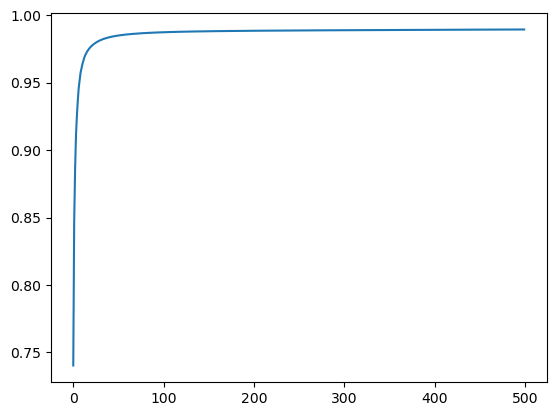

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [37]:
test = np.cumsum(pca.explained_variance_ratio_)
tmp = np.where(test>0.99)
print(tmp[0][0])

657


In [17]:
plt.figure()
plt.imshow(np.reshape(pca.components_[0,:], newshape=(128, 128)))

ValueError: cannot reshape array of size 16379 into shape (128,128)

<Figure size 640x480 with 0 Axes>

In [10]:
128*128

16384